# 4. 파이토치 기본
## 4.2 역전파 - 선형회귀식

In [1]:
import torch
from matplotlib import pyplot as plt

In [2]:
x = torch.FloatTensor(range(5)).unsqueeze(1)
y = 2*x + torch.rand(5,1)
print(x)
print(y)
num_features = x.shape[1]
print(num_features)

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.]])
tensor([[0.6702],
        [2.2949],
        [4.6233],
        [6.0241],
        [8.3329]])
1


In [3]:
print(x.shape, y.shape)

torch.Size([5, 1]) torch.Size([5, 1])


In [4]:
#dtype = torch.FloatTensor
#W = Variable(torch.randn(num_features, 1), requires_grad=True)
#b = Variable(torch.randn(1), requires_grad=True)
w = torch.randn(num_features, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

In [5]:
learning_rate = 1e-3 # 0.001
optimizer = torch.optim.SGD([w, b], lr=learning_rate)

In [6]:
print(w.shape, b.shape)

torch.Size([1, 1]) torch.Size([1])


In [7]:
loss_stack = []
for epoch in range(1001):

    # 최적화 함수를 고르기
    # 최적화가 가지고 있는 이전의 기울기를 0으로 초기화 하는 명령어,
    optimizer.zero_grad()

    # 임의의 수식이 들어간 자리에, 모델이 들어감
    # y = wx + b, 순전파 및 예측하기.
    # y_hat : 예측값,
    y_hat = torch.matmul(x, w) + b
    # 예측값 - 실제값을 빼고, 제곱 평균을 구하기. MSE
    # 오차(손실) 작을수록 좋다.
    loss = torch.mean((y_hat-y)**2)
    # 얼마나 영향을 미쳤는지를 역으로 계산을 해주세요. (미분을 이용함)-> 최솟값 찾기 놀이.
    # 1번 실행시 구한 w, b 의 값이 최적화 1번째 시도시 구한 최적값.
    loss.backward()
    # 역전파를 통해, 계산된 기울기를 참고해서, 최적화하기, 실제로 가중치 w, 편향b 업데이트
    optimizer.step()
    # 손실 값을 따로 기록을 해서, 얼마나 개선이 되는지를 추적하는 용도다. ~~
    loss_stack.append(loss.item())
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}:{loss.item()}')

Epoch 0:6.21610164642334
Epoch 100:0.5222727060317993
Epoch 200:0.13141699135303497
Epoch 300:0.09826456755399704
Epoch 400:0.0899529904127121
Epoch 500:0.08399742096662521
Epoch 600:0.0788077563047409
Epoch 700:0.07420865446329117
Epoch 800:0.07012766599655151
Epoch 900:0.06650600582361221
Epoch 1000:0.06329203397035599


In [8]:
with torch.no_grad():
    y_hat = torch.matmul(x, w) + b

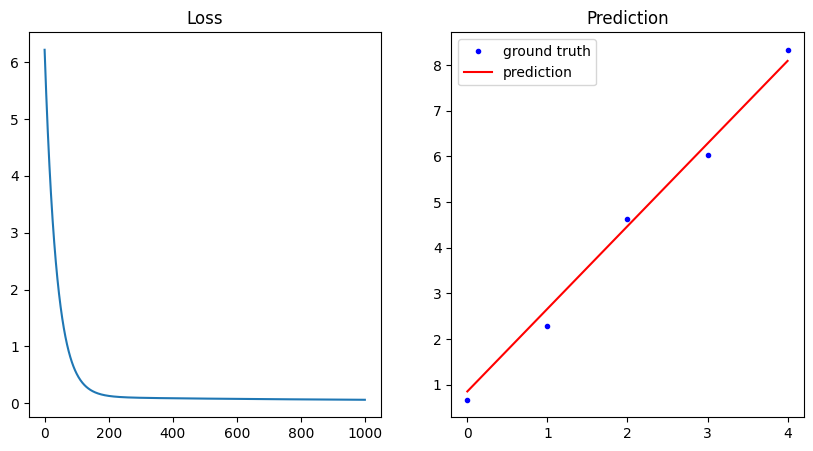

In [9]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(loss_stack)
plt.title("Loss")
plt.subplot(122)
plt.plot(x, y,'.b')
plt.plot(x, y_hat, 'r-')
plt.legend(['ground truth','prediction'])
plt.title("Prediction")
plt.show()